In [1]:
import pandas as pd
import matplotlib.pyplot    as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import numpy                as np
import plotly.express       as px
import plotly.graph_objects as go
import seaborn              as sns
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('../data/Supermarket_Sales_cleaned.xlsx')
df_viz = pd.read_excel('../data/Supermarket_Sales_model_input.xlsx')

Phần 1: Phân tích theo giới tính

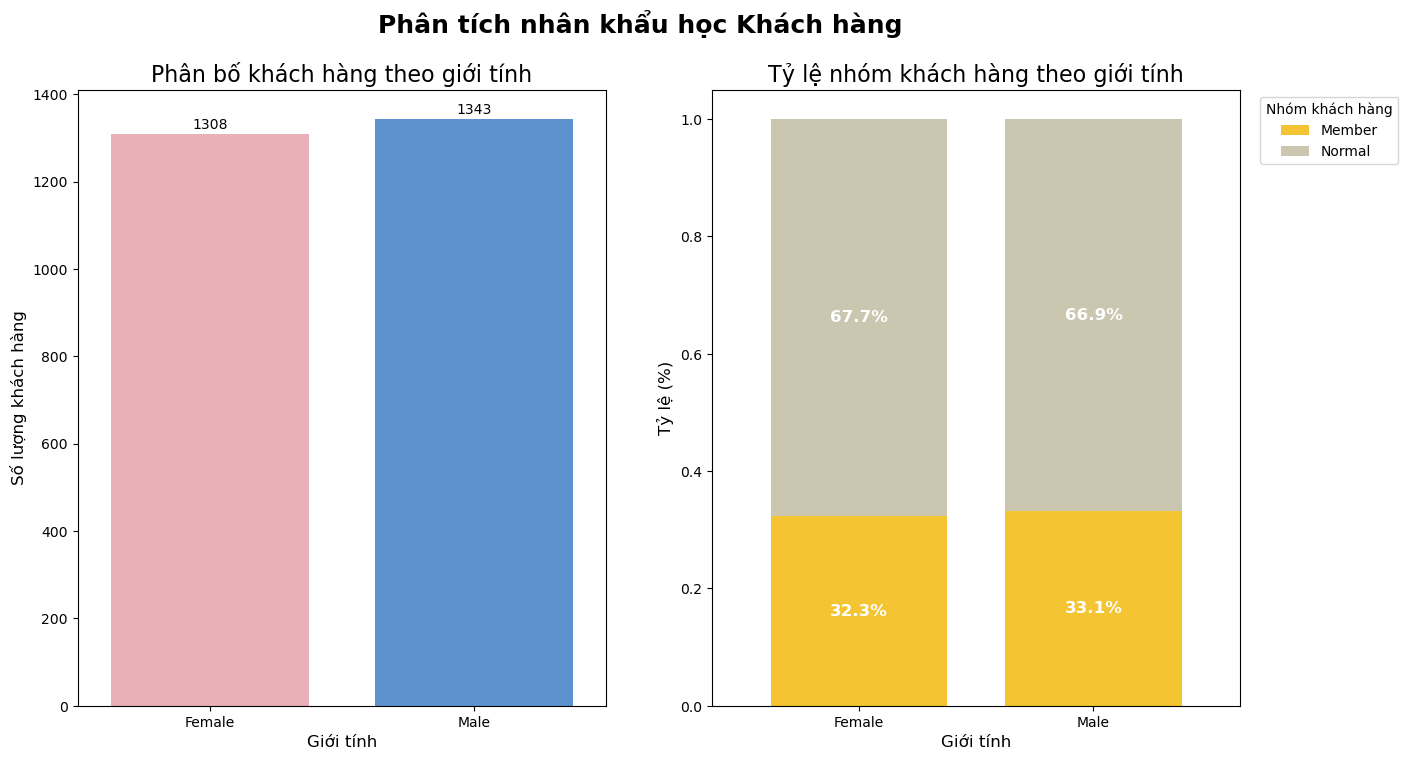

In [3]:
plt.figure(figsize=(15, 8))
plt.suptitle('Phân tích nhân khẩu học Khách hàng', fontsize=18, fontweight='bold')

# Biểu đồ 1: Số lượng khách hàng theo giới tính
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Giới_tính', data=df_viz, palette={'Female': '#F4A6B1', 'Male': '#4A90E2'}, ax=ax1, width=0.75)

ax1.set_title('Phân bố khách hàng theo giới tính', fontsize=16)
ax1.set_xlabel('Giới tính', fontsize=12)
ax1.set_ylabel('Số lượng khách hàng', fontsize=12)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

# Biểu đồ 2: Tỷ lệ nhóm khách hàng theo giới tính (stacked bar) 
ax2 = plt.subplot(1, 2, 2)
gender_group_ct = pd.crosstab(df_viz['Giới_tính'], df_viz['Nhóm_khách_hàng'])
gender_group_pct = gender_group_ct.div(gender_group_ct.sum(axis=1), axis=0)
gender_group_pct = gender_group_pct[['Member', 'Normal']] # Đảm bảo thứ tự
gender_group_pct.plot(kind='bar', stacked=True, ax=ax2, color={'Normal': "#B0A885A7", 'Member': "#F4BD18E3"}, width=0.75)

ax2.set_title('Tỷ lệ nhóm khách hàng theo giới tính', fontsize=16)
ax2.set_xlabel('Giới tính', fontsize=12)
ax2.set_ylabel('Tỷ lệ (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Nhóm khách hàng', bbox_to_anchor=(1.025, 1), loc='upper left')

for n, x in enumerate(gender_group_pct.index):
    for proportion, y_loc in zip(gender_group_pct.loc[x], gender_group_pct.loc[x].cumsum()):
        ax2.text(n, y=(y_loc - proportion/2), s=f'{proportion:.1%}',
                 color='white', fontsize=12, fontweight='bold', ha='center', va='center')

ax1.grid(False)
ax2.grid(False)
plt.show()

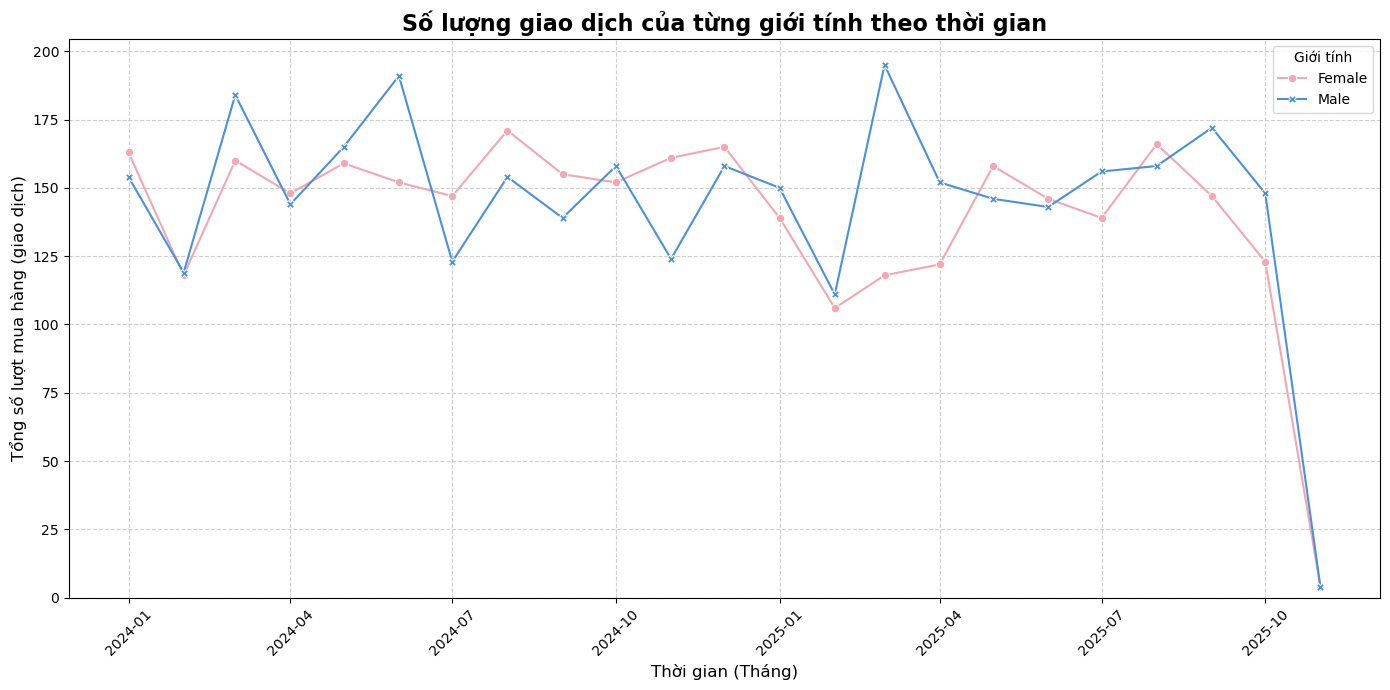

In [4]:
# Tạo một bản sao từ df gốc để xử lý thời gian
df_time = df.copy()
df_time['Tháng'] = df_time['Thời gian'].dt.to_period('M')

# Nhóm theo Tháng và Giới tính để đếm SỐ LƯỢNG GIAO DỊCH
transactions_over_time = df_time.groupby(['Tháng', 'Giới tính']).size().reset_index(name='Số lượt mua hàng')
transactions_over_time['Tháng'] = transactions_over_time['Tháng'].dt.to_timestamp()

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=transactions_over_time, x='Tháng', y='Số lượt mua hàng',
    hue='Giới tính', style='Giới tính', markers=True, dashes=False,
    palette={'Female': '#F4A6B1', 'Male': '#4A90E2'}
)

plt.title('Số lượng giao dịch của từng giới tính theo thời gian', fontsize=16, fontweight='bold')
plt.xlabel('Thời gian (Tháng)', fontsize=12)
plt.ylabel('Tổng số lượt mua hàng (giao dịch)', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)
plt.legend(title='Giới tính')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Phần 2: Phân tích theo nhóm khách hàng

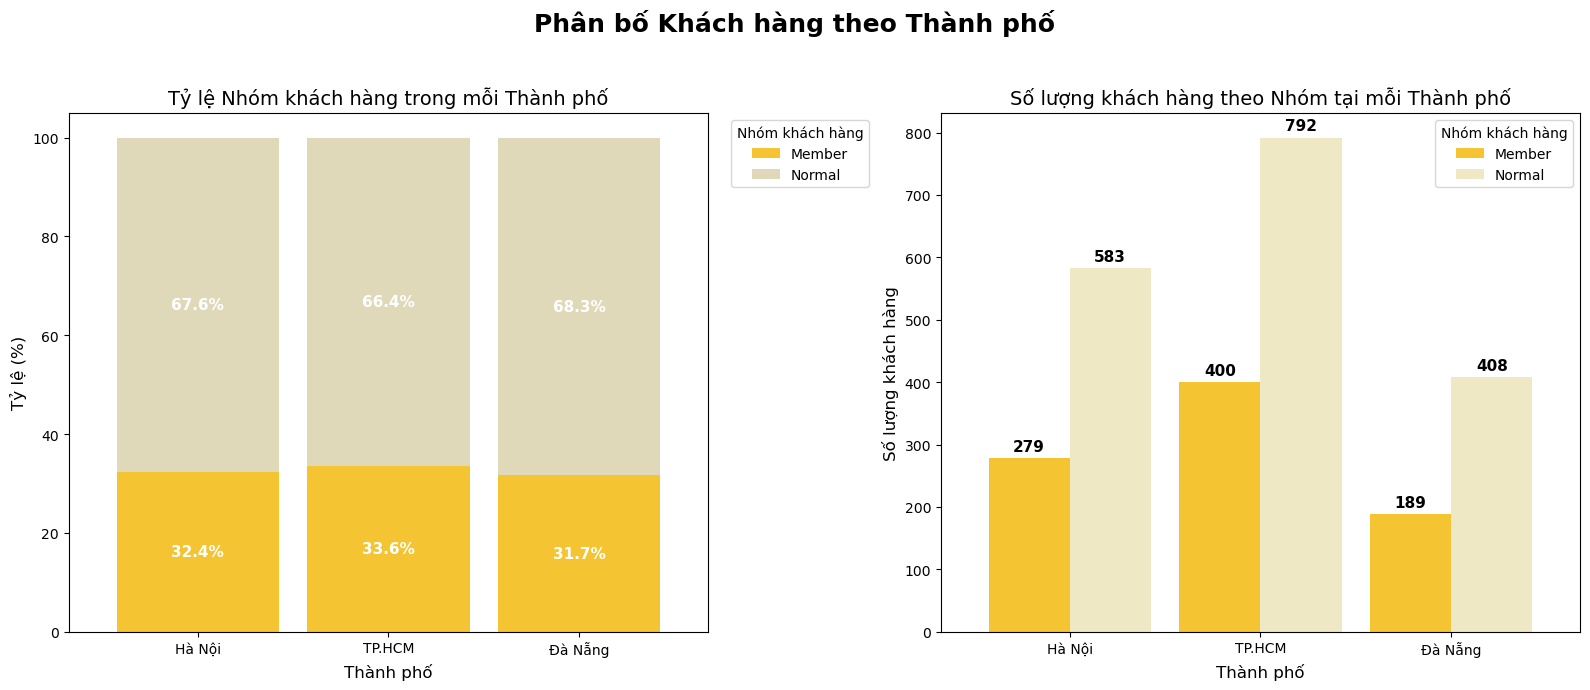

In [5]:
# Bảng chéo tính SỐ LƯỢNG KHÁCH HÀNG cho mỗi Thành phố - Nhóm khách hàng
city_customer_counts = pd.crosstab(df_viz['Thành_phố'], df_viz['Nhóm_khách_hàng'])

# Tính bảng tỷ lệ %
city_customer_percentage = city_customer_counts.div(city_customer_counts.sum(axis=1), axis=0) * 100
city_customer_percentage = city_customer_percentage[['Member', 'Normal']] # Đảm bảo thứ tự

# Vẽ biểu đồ 
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Phân bố Khách hàng theo Thành phố', fontsize=18, fontweight='bold')

# Biểu đồ 1: Tỷ lệ Nhóm khách hàng
city_customer_percentage.plot(kind='bar', stacked=True, ax=axes[0],
                              color={'Normal': "#D0C695A7", 'Member': "#F4BD18E3"}, width=0.85)

axes[0].set_title('Tỷ lệ Nhóm khách hàng trong mỗi Thành phố', fontsize=14)
axes[0].set_xlabel('Thành phố', fontsize=12)
axes[0].set_ylabel('Tỷ lệ (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Nhóm khách hàng', bbox_to_anchor=(1.025, 1), loc='upper left')

for n, city in enumerate(city_customer_percentage.index):
    y_offset = 0
    for group, pct in city_customer_percentage.loc[city].items():
        if pct > 0:
            axes[0].text(n, y_offset + pct / 2, f"{pct:.1f}%",
                         ha='center', va='center', color='white', fontsize=11, fontweight='bold')
        y_offset += pct

# Biểu đồ 2: Số lượng khách hàng
city_customer_counts.plot(kind='bar', stacked=False, ax=axes[1],
                          color={'Normal': "#E8DDA7A7", 'Member': "#F4BD18E3"}, width=0.85)

axes[1].set_title('Số lượng khách hàng theo Nhóm tại mỗi Thành phố', fontsize=14)
axes[1].set_xlabel('Thành phố', fontsize=12)
axes[1].set_ylabel('Số lượng khách hàng', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Nhóm khách hàng')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold', padding=3)

axes[0].grid(False)
axes[1].grid(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
df_counts = df_viz.groupby(['Thành_phố', 'Chi_nhánh_ưa_thích', 'Nhóm_khách_hàng']).size().reset_index(name='counts')
dimensions = []
label_map = {
    'Thành_phố': 'Thành phố',
    'Chi_nhánh_ưa_thích': 'Chi nhánh ưa thích',
    'Nhóm_khách_hàng': 'Nhóm khách hàng'
}
dimensions = [
    go.parcats.Dimension(values=df_counts[col], label=label_map.get(col, col))
    for col in ['Thành_phố', 'Chi_nhánh_ưa_thích', 'Nhóm_khách_hàng']
]
color_map = {'Normal': 'rgba(244, 189, 24, 0.9)', 'Member': 'rgba(232, 221, 167, 0.7)'}
code_map = {'Normal': 0, 'Member': 1} 
df_counts['color'] = df_counts['Nhóm_khách_hàng'].map(code_map)

# Mã hóa nhóm khách hàng để ánh xạ màu
df_counts['color_code'] = df_counts['Nhóm_khách_hàng'].astype('category').cat.codes

# Tạo biểu đồ Parallel Categories với graph_objects
fig = go.Figure(data=[
    go.Parcats(
        dimensions=dimensions,
        counts=df_counts['counts'],
        line=dict(
            color=df_counts['color_code'],
            colorscale=[[0, color_map['Normal']], [1, color_map['Member']]],
            showscale=False
        ),
        hoveron='color',
        hoverinfo='count+probability',
        labelfont={'size': 14, 'family': 'Arial'},
        tickfont={'size': 12, 'family': 'Arial'},
        arrangement='freeform'
    )
])

# Trang trí và cập nhật layout
fig.update_layout(
    title={
        'text': '<b>Địa điểm mua sắm ưa thích của từng nhóm khách hàng</b>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial', 'color': 'darkblue'}
    },
    margin=dict(l=50, r=50, t=100, b=50),
    #height=600, width = 600
)

# Hiển thị biểu đồ
fig.show()

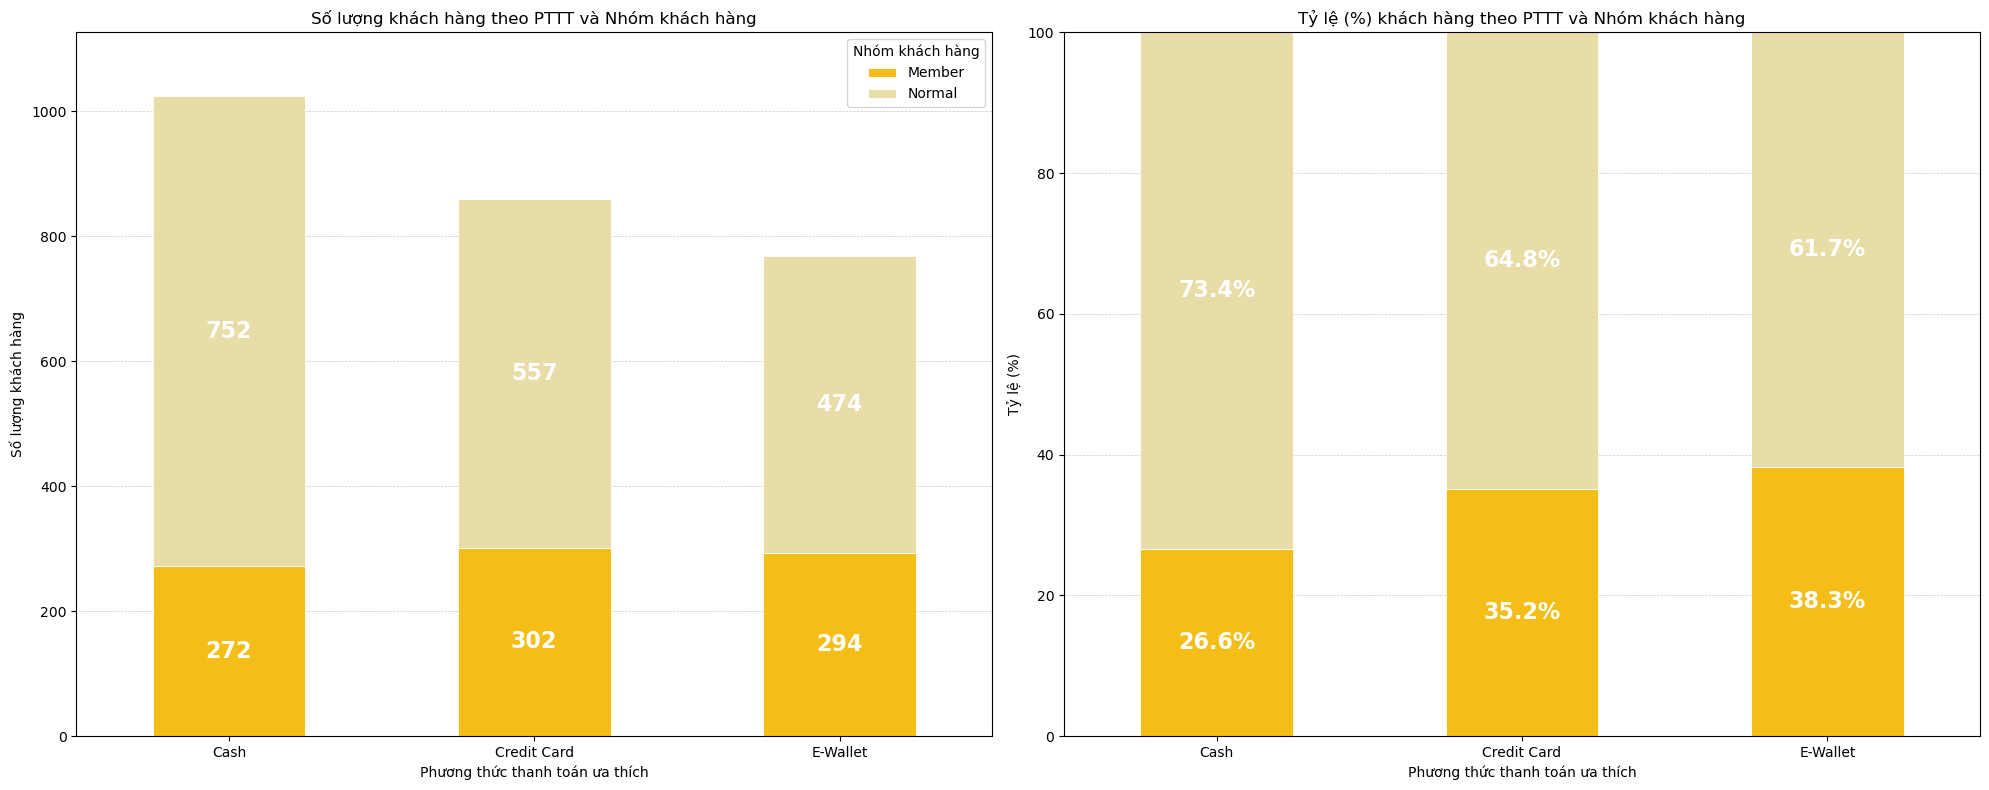

In [7]:
crosstab_df = pd.crosstab(
    index=df_viz['PTTT_ưa_thích'],
    columns=df_viz['Nhóm_khách_hàng']
)

cols = list(crosstab_df.columns)
if 'Member' in cols and 'Normal' in cols:
    cols = ['Member', 'Normal'] + [c for c in cols if c not in ('Member', 'Normal')]
    crosstab_df = crosstab_df[cols]

color_map = {'Normal': "#E8DDA7", 'Member': "#F4BD18"}
colors = [color_map.get(col, '#CCCCCC') for col in crosstab_df.columns]

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

crosstab_df.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=axes[0],
    rot=0,
    edgecolor='white',
    linewidth=0.6
)

text_kwargs = dict(color='white', fontsize=16, fontweight='bold')

for container in axes[0].containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    axes[0].bar_label(container, labels=labels, label_type='center', **text_kwargs)

axes[0].set_title('Số lượng khách hàng theo PTTT và Nhóm khách hàng')
axes[0].set_xlabel('Phương thức thanh toán ưa thích')
axes[0].set_ylabel('Số lượng khách hàng')
axes[0].legend(title='Nhóm khách hàng', loc='upper right')
axes[0].yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axes[0].xaxis.grid(False)
axes[0].set_axisbelow(True)
ymax = crosstab_df.sum(axis=1).max()
axes[0].set_ylim(0, ymax * 1.10)

crosstab_pct = crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

crosstab_pct.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=axes[1],
    rot=0,
    edgecolor='white',
    linewidth=0.6
)

for container in axes[1].containers:
    labels = [f"{v.get_height():.1f}%" if v.get_height() > 0 else '' for v in container]
    axes[1].bar_label(container, labels=labels, label_type='center', **text_kwargs)

axes[1].set_title('Tỷ lệ (%) khách hàng theo PTTT và Nhóm khách hàng')
axes[1].set_xlabel('Phương thức thanh toán ưa thích')
axes[1].set_ylabel('Tỷ lệ (%)')
axes[1].get_legend().set_visible(False)
axes[1].yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axes[1].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

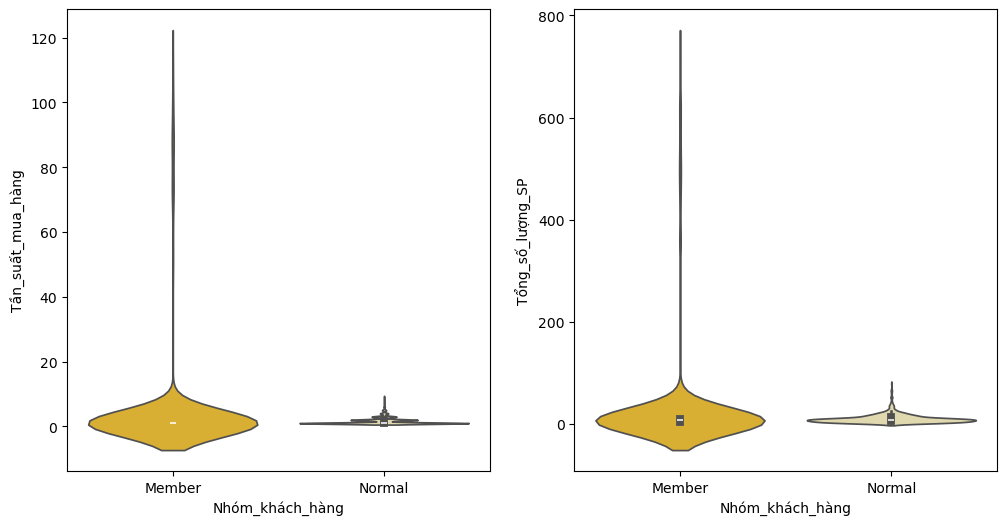

In [8]:
# Phân phối tần suất và khối lượng mua hàng theo nhóm khách hàng
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.violinplot(df_viz, x = "Nhóm_khách_hàng", 
               y = "Tần_suất_mua_hàng", 
               palette={'Normal': "#E8DDA7A7", 'Member': "#F4BD18E3"})
plt.subplot(1,2,2)
sns.violinplot(df_viz, x = "Nhóm_khách_hàng", 
               y = "Tổng_số_lượng_SP", 
               palette={'Normal': "#E8DDA7A7", 'Member': "#F4BD18E3"})
plt.show()


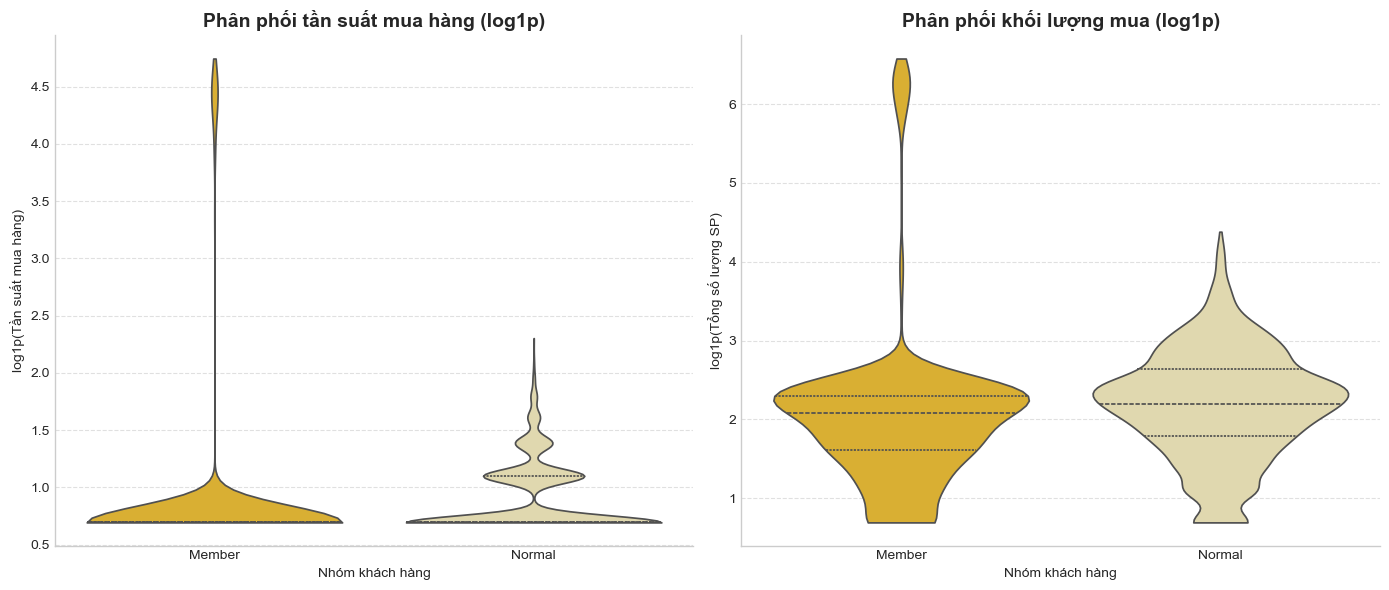

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')

df_viz_copy = df_viz.copy()
df_viz_copy['Tần_suất_mua_hàng_log1p'] = np.log1p(df_viz_copy['Tần_suất_mua_hàng'])
df_viz_copy['Tổng_số_lượng_SP_log1p'] = np.log1p(df_viz_copy['Tổng_số_lượng_SP'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = {'Member': '#F4BD18', 'Normal': '#E8DDA7'}

# Biểu đồ 1: Tần suất mua hàng (log1p)
sns.violinplot(
    data=df_viz_copy, x='Nhóm_khách_hàng', y='Tần_suất_mua_hàng_log1p',
    palette=palette, inner='quartile', cut=0, bw=0.2, scale='width', ax=axes[0]
)
axes[0].set_title('Phân phối tần suất mua hàng (log1p)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('log1p(Tần suất mua hàng)')
axes[0].set_xlabel('Nhóm khách hàng')

# Biểu đồ 2: Tổng số lượng SP (log1p)
sns.violinplot(
    data=df_viz_copy, x='Nhóm_khách_hàng', y='Tổng_số_lượng_SP_log1p',
    palette=palette, inner='quartile', cut=0, bw=0.2, scale='width', ax=axes[1]
)
axes[1].set_title('Phân phối khối lượng mua (log1p)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('log1p(Tổng số lượng SP)')
axes[1].set_xlabel('Nhóm khách hàng')

for ax in axes:
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()
plt.show()

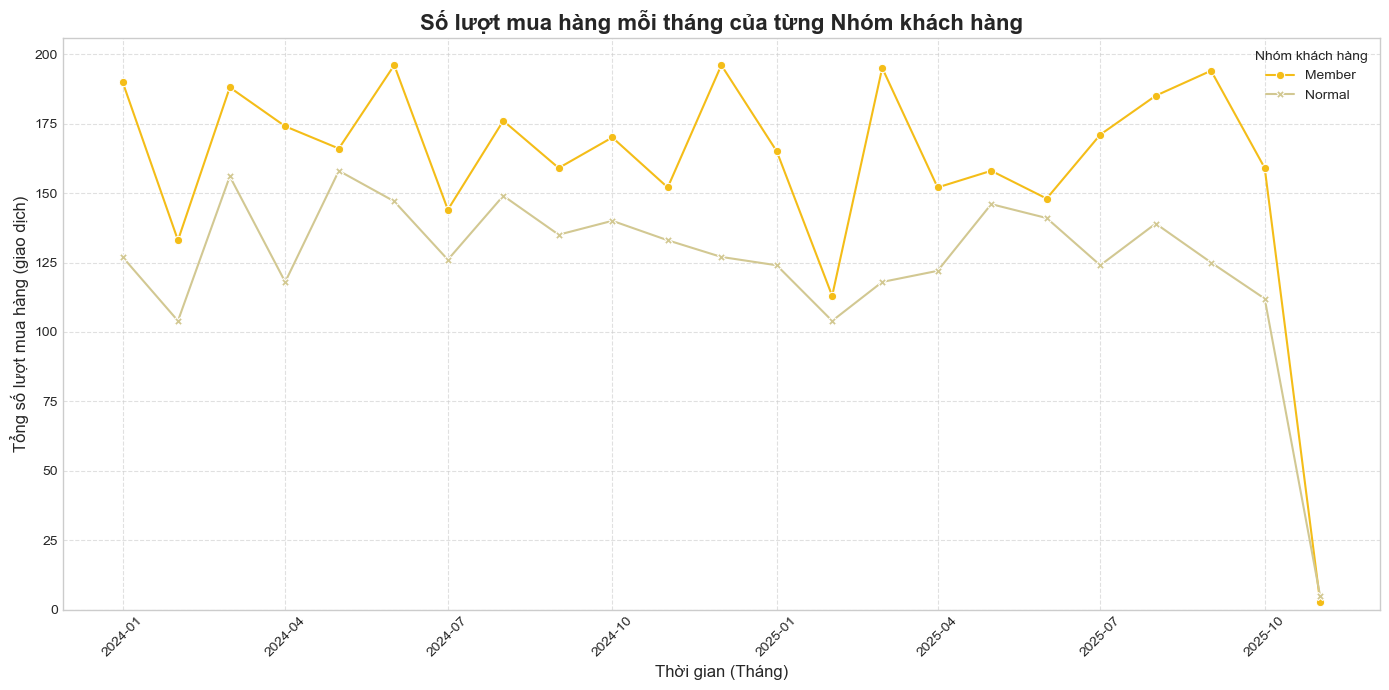

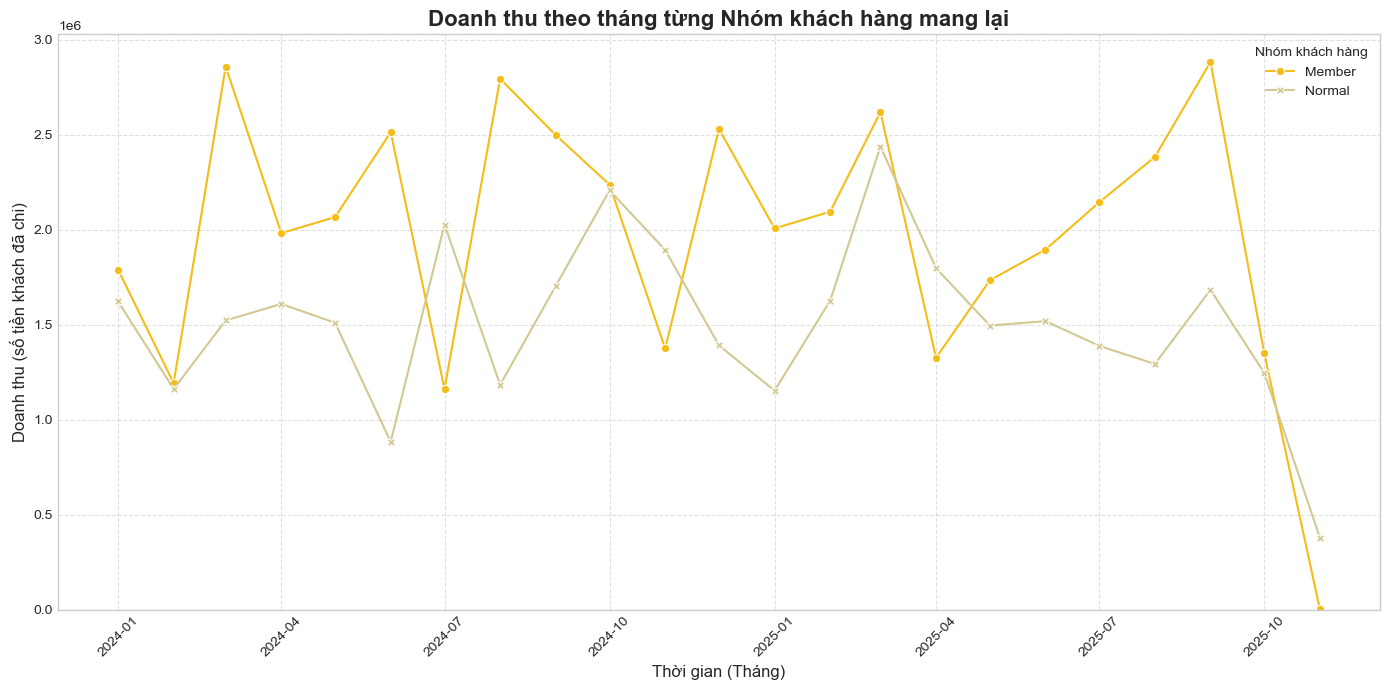

In [10]:
# Tần suất mua hàng của từng nhóm khách hàng theo thời gian

# Nhóm theo Tháng và Nhóm khách hàng để đếm SỐ LƯỢNG GIAO DỊCH
transactions_over_time = df_time.groupby(['Tháng', 'Nhóm khách hàng']).size().reset_index(name='Số lượt mua hàng')
transactions_over_time['Tháng'] = transactions_over_time['Tháng'].dt.to_timestamp()

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=transactions_over_time, x='Tháng', y='Số lượt mua hàng',
    hue='Nhóm khách hàng', style='Nhóm khách hàng', markers=True, dashes=False,
    palette={'Member': '#F4BD18', 'Normal': "#D2C892"}
)

plt.title('Số lượt mua hàng mỗi tháng của từng Nhóm khách hàng', fontsize=16, fontweight='bold')
plt.xlabel('Thời gian (Tháng)', fontsize=12)
plt.ylabel('Tổng số lượt mua hàng (giao dịch)', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)
plt.legend(title='Nhóm khách hàng')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


transactions_over_time = df_time.groupby(['Tháng', 'Nhóm khách hàng'])['Doanh thu ròng'].sum().reset_index()
transactions_over_time['Tháng'] = transactions_over_time['Tháng'].dt.to_timestamp()

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=transactions_over_time, x='Tháng', y='Doanh thu ròng',
    hue='Nhóm khách hàng', style='Nhóm khách hàng', markers=True, dashes=False,
    palette={'Member': '#F4BD18', 'Normal': "#D2C892"}
)

plt.title('Doanh thu theo tháng từng Nhóm khách hàng mang lại', fontsize=16, fontweight='bold')
plt.xlabel('Thời gian (Tháng)', fontsize=12)
plt.ylabel('Doanh thu (số tiền khách đã chi)', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)
plt.legend(title='Nhóm khách hàng')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

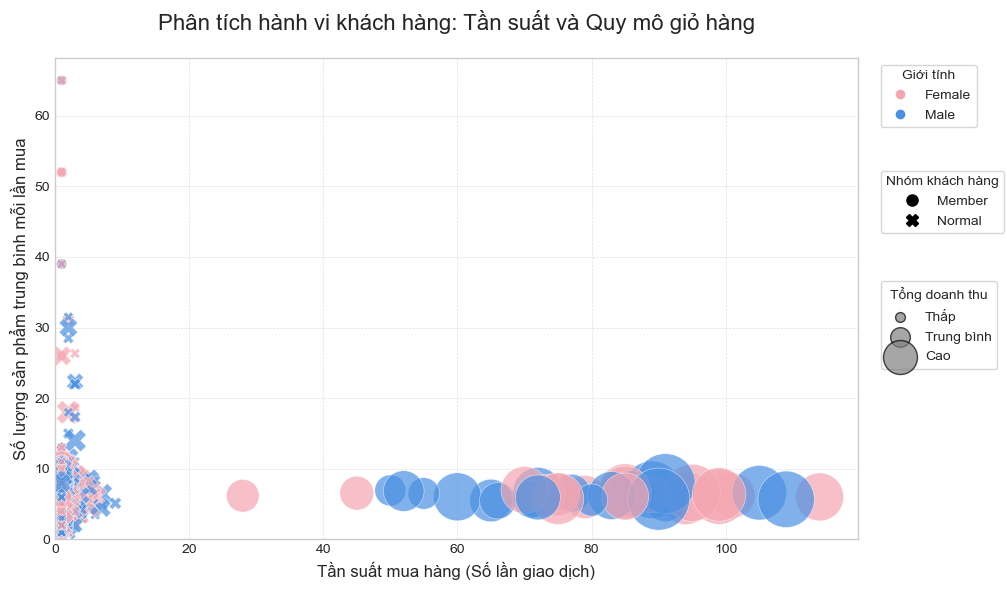

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

palette = {'Female': '#F4A6B1', 'Male': '#4A90E2'}
markers = {"Member": "o", "Normal": "X"}

sns.scatterplot(
    data=df_viz,
    x='Tần_suất_mua_hàng',
    y='Số_lượng_SP_trung_bình',
    hue='Giới_tính',
    style='Nhóm_khách_hàng',
    size='Tổng_doanh_thu',
    sizes=(50, 2000),
    alpha=0.7,
    palette=palette,
    markers=markers,
    linewidth=0.4,
    ax=ax
)

ax.set_title('Phân tích hành vi khách hàng: Tần suất và Quy mô giỏ hàng', 
             fontsize=16, pad=20)
ax.set_xlabel('Tần suất mua hàng (Số lần giao dịch)', fontsize=12)
ax.set_ylabel('Số lượng sản phẩm trung bình mỗi lần mua', fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)


from matplotlib.lines import Line2D

hue_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Female'], markersize=8),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Male'], markersize=8)
]
hue_labels = ['Female', 'Male']
leg1 = ax.legend(hue_handles, hue_labels, title='Giới tính', 
                 bbox_to_anchor=(1.02, 1.00), loc='upper left', frameon=True)

style_handles = [
    Line2D([0], [0], marker='o', color='k', linestyle='None', markersize=8, label='Member'),
    Line2D([0], [0], marker='X', color='k', linestyle='None', markersize=8, label='Normal')
]
leg2 = ax.legend(handles=style_handles, title='Nhóm khách hàng', 
                 bbox_to_anchor=(1.02, 0.78), loc='upper left', frameon=True)

size_vals = np.array([df_viz['Tổng_doanh_thu'].quantile(q) for q in [0.25, 0.5, 0.75]])
size_handles = [plt.scatter([], [], s=s, color='gray', alpha=0.7, edgecolor='k') for s in (50, 200, 600)]
size_labels = ['Thấp', 'Trung bình', 'Cao']
leg3 = ax.legend(size_handles, size_labels, title='Tổng doanh thu',
                 bbox_to_anchor=(1.02, 0.55), loc='upper left', frameon=True)

# Gắn lại theo thứ tự
ax.add_artist(leg1)
ax.add_artist(leg2)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()